cơ bản về Pytorch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
torch.cuda.is_available()

False

In [4]:
#sử dụng GPU và Cuda
torch.cuda.current_device


<function torch.cuda.current_device() -> int>

In [5]:
torch.cuda.get_device_name(0)

AssertionError: Torch not compiled with CUDA enabled

In [6]:
#trả về mức sử dụng bộ nhớ của GPU hiện tại theo tensoes tính bằng byte cho thiết bị nhất định
torch.cuda.memory_allocated()

0

In [7]:
#trả về bộ nhớ gpu hiện tại được quản lí bởi bộ nhớ đệm theo byte
torch.cuda.memory_cached()

C:\Users\lanan\AppData\Local\Temp\ipykernel_10200\3582578997.py:2: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  torch.cuda.memory_cached()


0

dataset with pytorch

In [8]:
#loading data Iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df =pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le=LabelEncoder()
X=df.drop(['Id','Species'],axis=1).values
y=le.fit_transform(df['Species'].values)

#chia du lieu voi test size=0.2
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train).reshape(-1,1)
y_test=torch.LongTensor(y_test).reshape(-1,1)



In [10]:
print(f'train size: {len(y_train)}')


train size: 120


In [11]:
label, count=y_train.unique(return_counts=True)
print(f'Label: {label,count}')

Label: (tensor([0, 1, 2]), tensor([40, 41, 39]))


In [13]:
#tính đọa hảm nằng pytỏch
#cho y= 2x^4+x^3+3x^2+5x+1
#tính y
#tạo một tensor với requirment_grad được đặt thành true 
x=torch.tensor(2.0,requires_grad=True)
print(x)
print(x.grad)

tensor(2., requires_grad=True)
None


In [14]:
#định nghĩa hàm
y=2*x**4+x**3+3*x**2+5*x+1
print(y)


tensor(63., grad_fn=<AddBackward0>)


In [15]:
y.grad_fn

In [16]:
#thực hiện chuyền ngược và tính toán tất cả các gradient
y.backward()
print(x.grad)

tensor(93.)


In [25]:
#bài tập về nhà 
#tinh y' của y=5x^6+3x^3+2x+x+2x+5x^4+1
#cho biết độ dốc của đa thức trên tại điểm nào

import torch

x = torch.tensor(2.0, requires_grad=True)
y = 5*x**6 + 3*x**3 + 5*x + 5*x**4 + 1
y.backward()

print(f"Hoành độ (x) = {x.item()}")
print(f"Tung độ (y) = {y.item()}")
print(f"Độ dốc tại x = {x.item()}: {x.grad.item()}")


Hoành độ (x) = 2.0
Tung độ (y) = 435.0
Độ dốc tại x = 2.0: 1161.0


In [12]:
#BTVN1 tạo một tensor x có giá trị ban đầu là 2.0 định nghĩa hàm số tính gradienr 
#y=x^3+2x^2+5x+1 hãy tính dy/dx tại giá trị của x 
#dùng phương pháp gradian Descent với learning rate là 0.1 cập nhật giá trị x trong 10 vòng lặp

# Khởi tạo giá trị ban đầu của x
x = torch.tensor(2.0, requires_grad=True)


In [13]:
# Hàm tính y = x^3 + 2x^2 + 5x + 1
def compute_y(x):
    return x**3 + 2 * x**2 + 5 * x + 1


In [17]:
# Thực hiện Gradient Descent
learning_rate = 0.1
num_iterations = 10

In [18]:
for i in range(num_iterations):
    # Tính giá trị của hàm số
    y = compute_y(x)

    # Tính gradient (dy/dx)
    y.backward()

    # In thông tin
    print(f"Vòng lặp {i + 1}: x = {x.item()}, y = {y.item()}, dy/dx = {x.grad.item()}")

    # Cập nhật giá trị của x
    with torch.no_grad():
        x -= learning_rate * x.grad

    # Đặt lại gradient về 0 để tránh cộng dồn
    x.grad.zero_()

Vòng lặp 1: x = 0.5338314175605774, y = 4.391238212585449, dy/dx = 7.990253448486328
Vòng lặp 2: x = -0.2651939392089844, y = -0.20396459102630615, dy/dx = 4.15020751953125
Vòng lặp 3: x = -0.6802147030830383, y = -1.790419340133667, dy/dx = 3.667217254638672
Vòng lặp 4: x = -1.0469363927841187, y = -3.190052032470703, dy/dx = 4.100481986999512
Vòng lặp 5: x = -1.4569846391677856, y = -5.132207870483398, dy/dx = 5.540473937988281
Vòng lặp 6: x = -2.0110321044921875, y = -9.099777221679688, dy/dx = 9.088621139526367
Vòng lặp 7: x = -2.919894218444824, y = -21.44228744506836, dy/dx = 18.897769927978516
Vòng lặp 8: x = -4.809671401977539, y = -88.0443115234375, dy/dx = 55.160133361816406
Vòng lặp 9: x = -10.325685501098633, y = -938.3112182617188, dy/dx = 283.5566101074219
Vòng lặp 10: x = -38.68134689331055, y = -55076.74609375, dy/dx = 4339.01416015625


In [ ]:
#BTVN2: tạo một tập dữ liệu giả lập với x là số giờ học( ngẫu nghiên từ 1 đến 10) và y là số điểm tính theo công thức 
# y=3x+5+noise 
#với noise là một giá trị ngẫu nhiên nhỏ 
#1. khởi tạo tham số w lưu vào b ngẫu nhiên với requires_grad=True
#2. tính MSE
#3. tính gradian
#4. cập nhật w và b bằng gradian descent với learning rate alpha=0.01
#5. lặp lại bước quá trình trên trong 100 vòng lặp và quan sát sự hội tụ của mô hình


In [20]:
# 1. Tạo tập dữ liệu giả lập
x = torch.FloatTensor(10).uniform_(1, 10).view(-1, 1)  # x từ 1 đến 10
y = 3 * x + 5 + torch.randn(x.size()) * 0.5  # y = 3x + 5 + noise

In [ ]:
# 2. Khởi tạo tham số w và b
w = torch.randn(1, requires_grad=True)  
b = torch.randn(1, requires_grad=True)  

In [22]:
# 3. Hàm tính MSE
def compute_loss(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

In [23]:
# 4. Gradient Descent
learning_rate = 0.01
num_epochs = 100
losses = []

In [27]:
#lặp lại 100 vòng lặp
for epoch in range(num_epochs):
    # Dự đoán giá trị y
    y_pred = w * x + b

    # Tính toán lỗi
    loss = compute_loss(y_pred, y)

    # Ghi nhận loss để vẽ đồ thị
    losses.append(loss.item())

    # Tính gradient
    loss.backward()

    # Cập nhật w và b
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # Reset gradient về 0
        w.grad.zero_()
        b.grad.zero_()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}: w = {w.item():.4f}, b = {b.item():.4f}, Loss = {loss.item():.4f}")


Epoch 10: w = 3.4238, b = 2.1025, Loss = 1.2883
Epoch 20: w = 3.4130, b = 2.1736, Loss = 1.2365
Epoch 30: w = 3.4025, b = 2.2431, Loss = 1.1868
Epoch 40: w = 3.3921, b = 2.3112, Loss = 1.1393
Epoch 50: w = 3.3820, b = 2.3778, Loss = 1.0937
Epoch 60: w = 3.3721, b = 2.4430, Loss = 1.0501
Epoch 70: w = 3.3624, b = 2.5068, Loss = 1.0083
Epoch 80: w = 3.3529, b = 2.5693, Loss = 0.9682
Epoch 90: w = 3.3436, b = 2.6304, Loss = 0.9298
Epoch 100: w = 3.3345, b = 2.6903, Loss = 0.8931


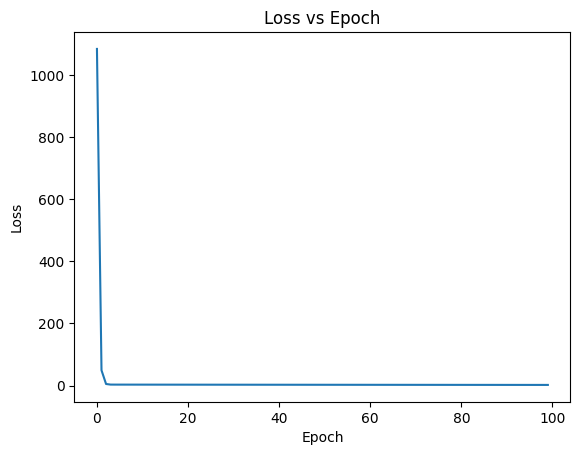

Final parameters: w = 3.5591933727264404, b = 1.2116360664367676


In [25]:
# 5. Quan sát sự hội tụ
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()

print(f"Final parameters: w = {w.item()}, b = {b.item()}")


In [ ]:
#pytorch with tensor 

In [26]:
import torch
import numpy as np


In [27]:
torch.__version__

'2.6.0+cpu'

In [28]:
#chuyển đổi mảng numpy sang tensor pytorch 
arr=np.array([1,2,3,4,5])
print(arr)
print(arr.dtype)

[1 2 3 4 5]
int64


In [29]:
x= torch.from_numpy(arr)
print(x)

tensor([1, 2, 3, 4, 5])


In [30]:
print(x.dtype)

torch.int64


In [31]:
print(x.type())

torch.LongTensor


In [36]:
arr2=np.arange(0.,12.).reshape(4,3)
arr2

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [37]:
x2=torch.from_numpy(arr2)
print(x2)
print(x2.type())

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)
torch.DoubleTensor


copy anhd share

In [38]:
arr=np.arange(0,5)
x=torch.from_numpy(arr)
print(x)

tensor([0, 1, 2, 3, 4])


In [39]:
arr[0]=99
print(x)

tensor([99,  1,  2,  3,  4])


In [43]:
arr=np.arange(0,5)
x=torch.tensor(arr)
print(x)

tensor([0, 1, 2, 3, 4])


In [44]:
arr[0]=99
print(x)

tensor([0, 1, 2, 3, 4])


In [ ]:
#btvn3: giải thích tại sao có 2 trường hợp trên lại cho kết quả khác nhau
# với torch.from_numpy() thì tensor sẽ chia sẻ dữ liệu với mảng numpy ban đầu
# với torch.tensor() thì tensor sẽ tạo một bản sao của mảng numpy ban đầu
#vì vậy khi thay đổi giá trị của mảng numpy thì tensor sẽ thay đổi theo nếu sử dụng torch.from_numpy()'
# còn nếu sử dụng torch.tensor() thì tensor sẽ không thay đổi'

In [ ]:
# BTVN 4: bạn hãy giúp thầy về nhà tạo tensor với:

In [2]:
# Empyty
tensor_empty = torch.empty(3, 3)
print("Empty Tensor:\n", tensor_empty)


Empty Tensor:
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [3]:
# Zeros
tensor_zeros = torch.zeros(3, 3)
print("\nZeros Tensor:\n", tensor_zeros)



Zeros Tensor:
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [4]:
# Ones
tensor_ones = torch.ones(3, 3)
print("\nOnes Tensor:\n", tensor_ones)


Ones Tensor:
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [5]:
# Random
tensor_random = torch.rand(3, 3)
print("\nRandom Tensor:\n", tensor_random)


Random Tensor:
 tensor([[0.8745, 0.9735, 0.1788],
        [0.7442, 0.5412, 0.4586],
        [0.1066, 0.2750, 0.9392]])


In [ ]:
# Reshape với view
tensor_original = torch.arange(9)
tensor_view = tensor_original.view(3, 3)
print("\nTensor reshaped\n", tensor_view)



Tensor reshaped
 tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [ ]:
# view as
tensor_same_shape = torch.empty(3, 3)
tensor_view_as = tensor_original.view_as(tensor_same_shape)
print("\nTensor reshaped using view_as:\n", tensor_view_as)


Tensor reshaped using view_as:
 tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
